<a href="https://colab.research.google.com/github/abaldeo/CS598_DLH_Project/blob/CNN_DDI/DL4H_Team_31_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS598 DL4H: Project Notebook - Final
---
**Paper Title** - CNN-DDI: a learning-based method for predicting drug–drug interactions using convolution neural networks

**Members:**

*   Avinash Baldeo (abaldeo2@illinois.edu)
*   Jinfeng Wu (jinfeng4@illinois.edu)
*   Hao Zhang (haoz8@illinois.edu)


# Video Presentation
The video presentation & demo of this notebook is available for viewing at the following links:

### **Mediaspace**

### **Google Drive (Backup)**

# Introduction





## Background of the Problem


### 1. Type of Problem

The problem addressed in the paper is the prediction of drug-drug interactions (DDIs). Specifically, the research focuses on developing a computational method to predict whether two drugs will interact and the type of interaction they may have, which can be synergistic, antagonistic, or neutral (no reaction). This is a problem of feature engineering and predictive modeling within the domain of bioinformatics and pharmacology.

### 2. Importance of the Problem

Predicting DDIs is crucial for pharmaceuticals development for several reasons:

- Antagonistic interactions can lead to reduced drug efficacy or increased toxicity, which can harm patients. Predicting such interactions can prevent adverse drug events.
-  Early prediction of DDIs can save time and resources in the drug development process by identifying potential issues before clinical trials.
- Understanding DDIs is key to customizing drug regimens for individual patients, especially those on multiple medications.
- By avoiding adverse drug reactions, we can reduce hospital readmissions and other healthcare costs associated with managing drug complications.
- Knowing if two drugs interact is also useful since drugs similar to either of the two are more likely to interact and cause the same effect.

### 3. Difficulty of the Problem

The prediction of DDIs is challenging due to:

- The way drugs interact can be influenced by numerous factors, including genetics, lifestyle, and the presence of other drugs.
- Drug data is typically heterogenous and comes from various sources and in different formats, making it difficult to integrate and analyze.
- Drugs can be described by many features, such as chemical properties, targets, and pathways, leading to high-dimensional data that is hard to process.
- Many potential drug combinations have not been observed or recorded, leading to sparse data and making it difficult to predict interactions for new or less-studied drugs.

### 4. State of the Art Methods and Effectiveness

The paper reviews mentions traditional and state-of-the-art methods for predicting DDIs:

-  Traditional methods include text mining and statistical methods, which have been the foundation for early DDI prediction efforts.
- Logistic regression and other classical machine learning models have been used to predict DDIs by analyzing drug features.
- More recent studies have applied deep learning methods, such as Deep Neural Networks (DNNs) and Convolutional Neural Networks (CNNs), to predict DDIs. These methods can automatically learn complex representations of drug features.




## Paper Explanation


### 1. What did the paper propose?

The paper proposed a novel algorithm named CNN-DDI, which utilizes a convolutional neural network (CNN) architecture to predict drug-drug interactions (DDIs). The method involves two main components:

- This feature selection part of the algorithm calculates the similarity between drug feature vectors using measures like Jaccard similarity. It then optimizes the data from high dimension to low dimension to generate feature vectors as input for the prediction module.
- The prediction module uses the feature vectors from the selection module as inputs to predict DDI-associated events. The CNN model consists of five convolutional layers, two fully connected layers, a residual block and a softmax layer.

### 2. What are the innovations of the method?

The main innovations of the CNN-DDI paper include:

- The method uses a combination of drug categories, targets, pathways, and enzymes as feature vectors, which was unique in the context of DDI prediction.
-  While deep neural networks (DNNs) have been used in the past for similar tasks, the paper highlights the advantages of CNNs in feature learning and reducing overfitting and dealing with noise in input.
- The paper demonstrates that using a combination of multiple drug features leads to more informative and effective predictions than using a single feature type.
- The CNN-DDI algorithm works well for different similarity measures (Jaccard, cosine, and Gaussian), with Jaccard similarity being used in the experiments.

### 3. How well the proposed method work (in its own metrics)

The proposed CNN-DDI method performed well according to the metrics used in the study. The CNN-DDI algorithm outperforms other methods like Random Forest (RF), Gradient Boosting Decision Tree (GBDT), Logistic Regression (LR), and K-Nearest Neighbor (KNN) across several evaluation metrics. Specifically, CNN-DDI achieved the highest scores in accuracy (ACC), area under the precision-recall curve (AUPR), area under the ROC curve (AUC), F1-score, precision, and recall. The paper also compared CNN-DDI with the prior DNN model (DDIMDL) and claimed that CNN-DDI still performed better even when using the same features.

### 4. What is the contribution to the research regime?

- The paper tries to advance DDI prediction by introducing a novel method that leverages the strengths of CNNs for feature learning and prediction.
- By providing a more accurate method for predicting DDIs, the paper contributes to the drug development process, potentially reducing the time and resources spent on identifying adverse drug interactions.
- The method could be used to improve patient safety by better predicting potential DDIs, thus preventing adverse effects that could arise from drug combinations.
- The CNN-DDI algorithm could be instrumental in the field of personalized medicine, where accurate DDI predictions are essential for tailoring drug regimens to individual patients.

The CNN-DDI paper demonstrates the importance of feature learning and the potential of deep learning in improving the prediction of DDIs.



# Scope of Reproducibility:
The primary hypothesis of the paper is that the CNN-DDI model, which utilizes a feature selection framework and a novel CNN architecture, can accurately predict drug-drug interactions and outperform other the models mentioned in the paper (Random forest, Logistic Regression, K-nearest neighbor, Gradient boosted Decision Tree, & DDIMDL). This hypothesis is tested by implementing the CNN-DDI model according to the details mentioned in the paper and training on the collected dataset with the same (inferred) hyperparameters settings. Afterwards, we compare the results in table 3 and 4 from the paper to our results.

The secondary hypothesis tested is that CNN-DDI feature selection is robust to the different similarity measures, namely Jaccard, Gaussian and Cosine. To verify this we run CNN-DDI model with the feature similarity matrices constructed  from these 3 different measures and compare our results to table 1.

The last hypothesis tested is that the combination of four features has the
highest AUPR score in all combinations and that adding every feature improves the performance of CNN-DDI to some degree. This is done by reproducing table 2.

# Methodology




## Environment

Most of the code in this notebook is taken from the [github repo](https://github.com/YifanDengWHU/DDIMDL) for the paper "A multimodal deep learning framework for predicting drug-drug interaction events" [2]. This code was written for Python 3.7 and had the following dependencies.

* numpy (==1.18.1)
* Keras (==2.2.4)
* pandas (==1.0.1)
* scikit-learn (==0.21.2)
* tensorflow (==1.15)

The code for this notebook is updated to be run in google colab environment (Python 3.10) and is tested with the following package versions:
    

* numpy (==1.25.2)
* pandas (==2.0.3)
* scikit-learn (==1.2.2)
* tensorflow (==2.15.0)
* tqdm (==4.66.2)
* psutil (==5.9.5)
* gdown (==4.7.3)


In [ ]:
!python --version

Python 3.10.12


If not running in Google colab environment, uncomment & run the following commands to install all dependencies.


In [1]:
# !pip install numpy==1.25.2
# !pip install pandas==2.0.3
# !pip install scikit-learn==1.2.2
# !pip install tensorflow==2.15.0
# !pip install tqdm==4.66.2
# !pip install psutil==5.9.5
# !pip install gdown==4.7.3

In [2]:
import sys
import os
import random
import csv
import sqlite3
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import DataFrame
from tqdm import tqdm

# set seed
seed = 1
# random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version: 2.15.0
Num GPUs Available:  0


In [3]:
def set_max_gpu_mem(size=10,unit=1024):
  limit = size * unit
  gpus = tf.config.experimental.list_physical_devices('GPU')
  if gpus:
      try:
          # Restrict TensorFlow to only allocate specified memory on the first GPU
          print(f"Setting GPU memory limit to {size}GB.")
          tf.config.experimental.set_virtual_device_configuration(
              gpus[0],
              [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=limit)])
          logical_gpus = tf.config.experimental.list_logical_devices('GPU')
          print(len(gpus), "Physical GPU,", len(logical_gpus), f"Logical GPU(s) with memory limit:{limit}")
      except RuntimeError as e:
          # Virtual devices must be set before GPUs have been initialized
          print(e)

In [4]:
# SET MEMORY LIMIT TO AT LEAST 10GB AVOID CRASHING DURING TRAINING
# ADJUST AS NEEEDED
set_max_gpu_mem(15)

In [5]:
import psutil
PROCESS = psutil.Process(os.getpid())

def print_memory_usage(unit_size=10 ** 6):
    """Prints current memory usage stats.
    See: https://stackoverflow.com/a/15495136

    :return: None
    """
    total, available, percent, used, free, *_ = psutil.virtual_memory()
    total, available, used, free = total / unit_size, available / unit_size, used / unit_size, free / unit_size
    proc = PROCESS.memory_info()[1] / unit_size
    print('process = %s total = %s available = %s used = %s free = %s percent = %s'
          % (proc, total, available, used, free, percent))


## Data
The  dataset used by CNN-DDI is from the DDIMDL Github repository (https://github.com/YifanDengWHU/DDIMDL). The DDIMDL paper classifies  DDIs’ events into 65 types and includes 572 drugs with more than 70,000 associated events. The data was originally collected from the DrugBank website (https://go.drugbank.com/)  using a web scraper and then processed and stored into a SQLite database (event.db). To utilize this dataset for CNN-DDI, we had to extract the 1622 category types for the drugs in the database from the Drugbank and store it.
The database is stored in the public google drive folder and should be automatically downloaded from there. The updated scraper code to include category is our github repo and is purposely left out of this notebook to save time as its not needed to be run again.

### Data Loading

In [6]:
# Function to check if running on Google Colab
def is_running_on_colab():
    return 'google.colab' in sys.modules

In [ ]:
if is_running_on_colab() and 0: # enable/disable using my drive folder
    from google.colab import drive
    print('using my drive folder')
    # Mount Google Drive
    DRIVE_PATH = '/content/drive'
    drive.mount(DRIVE_PATH)
    BASE_PATH = f"{DRIVE_PATH}/My Drive/CNN_DDI_Final/"
else:
    # use gdown to download from public drive folder
    import gdown, time
    print('downloading from public drive folder')
    start_time = time.time()
    #Draft
    # url = "https://drive.google.com/drive/folders/1ln1ga9J7XzwAnAikKXS-ejXcPLe27jgI?usp=sharing"
    # Final
    url = "https://drive.google.com/drive/folders/1wSjRXvV91kcJbnOt9nDdHI_8DM-34Gr3?usp=drive_link"
    output_folder = 'CNN_DDI'
    gdown.download_folder(url, output=output_folder, quiet=False)
    duration  = time.time() - start_time
    print(f"Download completed in {duration:.2f} seconds.")
    BASE_PATH = f"./{output_folder}/"

In [9]:
# Define data and model path
EVENT_DATA_PATH = BASE_PATH + "event.db"
# DRUG_LIST_PATH =  BASE_PATH + "DrugList.txt"
WEIGHT_PATH =  BASE_PATH + "models_weights"

In [10]:
VECTOR_SIZE = 572                       # num drugs (model input size)
EVENT_NUM = 65                          # num unique event types
DROP_RATE = 0.3                         # Default dropout rate
conn = sqlite3.connect(EVENT_DATA_PATH)

* **df_drug** contains 572 kinds of drugs and their features






In [11]:
df_drug = pd.read_sql('select * from drug;', conn)
print("df_drug shape", df_drug.shape)
print("-" * 40)
print("Columns:", df_drug.columns.tolist())
print("-" * 40)
df_drug.info()
print("-" * 40)
print("Sample:")
for index, row in df_drug.head().iterrows():
    print(row.to_dict())

df_drug shape (572, 8)
----------------------------------------
Columns: ['index', 'id', 'target', 'enzyme', 'pathway', 'smile', 'name', 'category']
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     572 non-null    int64 
 1   id        572 non-null    object
 2   target    572 non-null    object
 3   enzyme    572 non-null    object
 4   pathway   572 non-null    object
 5   smile     572 non-null    object
 6   name      572 non-null    object
 7   category  572 non-null    object
dtypes: int64(1), object(7)
memory usage: 35.9+ KB
----------------------------------------
Sample:
{'index': 0, 'id': 'DB01296', 'target': 'P14780|Q00653|P01375|P01579|P33673', 'enzyme': 'P33261|P05181', 'pathway': 'hsa:4318|hsa:4791|hsa:7124|hsa:3458', 'smile': '9|10|14|18|19|20|178|181|283|284|285|286|299|308|332|338|339|

* **df_event** contains 65 unique event types


In [12]:
df_event = pd.read_sql('select * from event_number;', conn)
print("df_event shape", df_event.shape)
print("-" * 40)
print("Columns:", df_event.columns.tolist())
print("-" * 40)
df_event.info()
print("-" * 40)
print(df_event.describe(include='all'))
print("-" * 40)
print("Sample:")
for index, row in df_event.head().iterrows():
    print(row.to_dict())

df_event shape (65, 2)
----------------------------------------
Columns: ['event', 'number']
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   event   65 non-null     object
 1   number  65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
----------------------------------------
                                                    event number
count                                                  65     65
unique                                                 65     52
top     The metabolism of name can be decreased when c...     10
freq                                                    1      5
----------------------------------------
Sample:
{'event': 'The metabolism of name can be decreased when combined with name.', 'number': '19620'}
{'event': 'The risk or severity of adverse effects can be increased 

* **df_interaction** contains the 37,264 DDIs between the 572 kinds of drugs


In [13]:
df_interaction = pd.read_sql('select * from event;', conn)
print("df_interaction shape", df_interaction.shape)
print("-" * 40)
print("Columns:", df_interaction.columns.tolist())
print("-" * 40)
df_interaction.info()
print("-" * 40)
print(df_interaction.describe(include='all').head(3))
print("-" * 40)
print("Sample:")
for index, row in df_interaction.head().iterrows():
    print(row.to_dict())

df_interaction shape (37264, 6)
----------------------------------------
Columns: ['index', 'id1', 'name1', 'id2', 'name2', 'interaction']
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        37264 non-null  int64 
 1   id1          37264 non-null  object
 2   name1        37264 non-null  object
 3   id2          37264 non-null  object
 4   name2        37264 non-null  object
 5   interaction  37264 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.7+ MB
----------------------------------------
          index      id1       name1      id2       name2  \
count   37264.0    37264       37264    37264       37264   
unique      NaN      560         560      558         558   
top         NaN  DB01118  Amiodarone  DB01149  Nefazodone   

                                              in


* **df_extraction** contains the interactions after NLP process was run on the list of drugs to parse extract key information about the interactions. Note, this was already done as data preprocessing step in original DDIMDL paper and was not performed again in the CNN-DDI paper. Hence, we simply load from the event.db database.

    * Mechanism: The biological effect of the drugs, such as effects on metabolism,
    serum concentration, or therapeutic efficacy.
    * Action: The change that occurs as a result of the interaction, typically an increase or decrease in the effect of one or both drugs.
    * Drug A: The drug whose efficacy is affected by the interaction.
    * Drug B: The other drug involved in the interaction.

In [14]:
df_extraction = pd.read_sql('select * from extraction;', conn)
print("df_extraction shape", df_extraction.shape)
print("-" * 40)
print("Columns:", df_extraction.columns.tolist())
print("-" * 40)
df_extraction.info()
print("-" * 40)
print(df_extraction.describe(include='all').head(3))
print("-" * 40)
print("Sample:")
for index, row in df_extraction.head().iterrows():
    print(row.to_dict())

mechanism = df_extraction['mechanism']
action = df_extraction['action']
drugA = df_extraction['drugA']
drugB = df_extraction['drugB']

df_extraction shape (37264, 5)
----------------------------------------
Columns: ['index', 'mechanism', 'action', 'drugA', 'drugB']
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37264 non-null  int64 
 1   mechanism  37264 non-null  object
 2   action     37264 non-null  object
 3   drugA      37264 non-null  object
 4   drugB      37264 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB
----------------------------------------
          index       mechanism    action        drugA       drugB
count   37264.0           37264     37264        37264       37264
unique      NaN              57         4          561         558
top         NaN  The metabolism  increase  Atomoxetine  Amiodarone
----------------------------------------
Sample:
{'index': 0, 'mechanism': 'The risk or

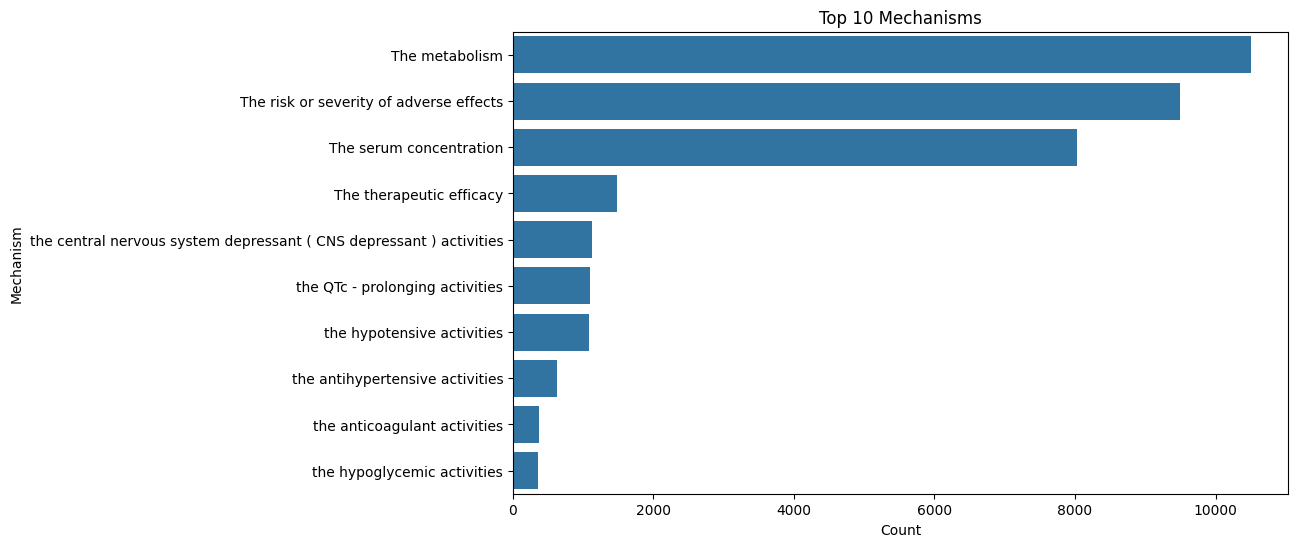

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each mechanism
mechanism_counts = df_extraction['mechanism'].value_counts()

# Get the top 10 mechanism
top_10_mechanism = mechanism_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_mechanism.values, y=top_10_mechanism.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Mechanism')
plt.title('Top 10 Mechanisms')

# Display the plot
plt.show()

### Data Preprocessing

 For each drug, a binary feature matrix is constructed based on the presence (1) or absence (0) of specific features. This is done by first extracting all unique features across all drugs for a given feature type and then populating a matrix where each row corresponds to a drug and each column to a feature. If a drug has a particular feature, the corresponding cell in the matrix is marked as 1, otherwise as 0.
 The Jaccard Similarity between the feature vectors of drugs is computed to measure the similarity between drugs based on their features.
 PCA is applied to reduce the dimensionality of the similarity matrix.
 The reduced-dimensionality feature vectors are then used as input for the CNN model to predict DDIs. For each drug-drug pair, the feature vectors of the two drugs are combined to form a single input vector to the model.

**Figure 1 - CNN-DDI [1] Feature Selection**

 ![Figure1.png](https://drive.google.com/uc?export=view&id=1sWcY2HtiPriRFlBcXqLRakNK73xzjSHg)



In [ ]:
def create_feature_set_name(feature_list):
    """
    Create a feature set name from a list of features.
    source code adapted from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L338

    Args:
        feature_list (list): A list of feature names.

    Returns:
        tuple: A tuple containing two elements:
            - feature_name (str): A string of concatenated feature names separated by "+".
    """
    feature_name = "+".join(feature_list)
    return feature_name

In [ ]:
# Define the Jaccard Similarity function
def Jaccard(matrix):
    """
    Calculate the Jaccard similarity between rows of a given matrix.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L89

    Args:
        matrix (array-like): A 2D array (or matrix) where each row represents a set in binary form (1s and 0s),
                             with 1 indicating the presence of an element in the set, and 0 indicating absence.

    Returns:
        numpy.matrix: A matrix of Jaccard similarity scores between each pair of rows in the input matrix.
    """
    matrix = np.mat(matrix)
    numerator = matrix * matrix.T
    denominator = np.ones(np.shape(matrix)) * matrix.T + matrix * np.ones(np.shape(matrix.T)) - matrix * matrix.T
    return numerator / denominator

In [ ]:
def Gaussian(matrix, gamma=None):
    """
    Calculate the Gaussian similarity between rows of a given matrix.

    Args:
        matrix (array-like): A 2D array (or matrix) where each row represents a feature vector.
        gamma (float, optional): The hyperparameter for the Gaussian kernel. If None, it is computed as
                                 1 / (average of the absolute values of the elements across all feature vectors).

    Returns:
        numpy.ndarray: A matrix of Gaussian similarity scores between each pair of rows in the input matrix.
    """
    if gamma is None:
      gamma = 1.0 / np.mean(np.abs(matrix))

    # Compute the squared Euclidean distance between each pair of rows
    sq_dists = np.sum((matrix[:, np.newaxis, :] - matrix[np.newaxis, :, :]) ** 2, axis=2)

    # Compute the Gaussian similarity
    return np.exp(-gamma * sq_dists)


In [ ]:
# Define the Cosine Similarity function
def Cosine(matrix):
    """
    Calculate the Cosine similarity between rows of a given matrix.

    Args:
        matrix (array-like): A 2D array (or matrix) where each row represents a feature vector.

    Returns:
        numpy.ndarray: A matrix of Cosine similarity scores between each pair of rows in the input matrix.
    """
    normalized_matrix = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)
    return np.dot(normalized_matrix, normalized_matrix.T)

In [ ]:
from sklearn.decomposition import PCA

similarity_fn_map = {'Jaccard': Jaccard,
                     'Gaussian': Gaussian,
                     'Cosine': Cosine,
                     'Kulczynski': Kulczynski}

def feature_vector(feature_name, df, vector_size, similarity_measure='Jaccard'):
    """
    Generates a feature vector for each drug based on the specified feature using Jaccard Similarity and PCA reduction.

    This function first constructs a feature matrix for drugs based on the presence or absence of specific features
    (e.g., targets, enzymes). It then computes the Jaccard Similarity matrix for these drugs and finally reduces the
    dimensionality of this matrix to the specified vector size using PCA.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L86

    Args:
        feature_name (str): The name of the feature column in the DataFrame `df` to be used for generating feature vectors.
        df (DataFrame): A pandas DataFrame containing drug data. Each row corresponds to a drug, and the specified
                        feature column contains feature identifiers separated by '|'.
        vector_size (int): The target number of dimensions for the feature vectors after PCA reduction.

    Returns:
        numpy.ndarray: A 2D array where each row represents the reduced-dimensionality feature vector for a drug.
    """
    all_feature = []
    drug_list = np.array(df[feature_name]).tolist()
    # Extract unique features from the feature column for all drugs
    for features in drug_list:
        for each_feature in features.split('|'):
            if each_feature not in all_feature:
                all_feature.append(each_feature)

    # Initialize a feature matrix with zeros
    feature_matrix = np.zeros((len(drug_list), len(all_feature)), dtype=float)
    # Construct a DataFrame for easier manipulation
    df_feature = DataFrame(feature_matrix, columns=all_feature)

    # Populate the feature matrix with 1s where a drug has a particular feature
    for i, features in enumerate(drug_list):
        for each_feature in features.split('|'):
            df_feature.at[i, each_feature] = 1

    # Compute the Similarity matrix
    Similarity = similarity_fn_map[similarity_measure]
    sim_matrix = Similarity(np.array(df_feature))
    sim_matrix = np.asarray(sim_matrix)

    # Apply PCA to reduce the dimensionality of the similarity matrix
    pca = PCA(n_components=vector_size)
    pca.fit(sim_matrix)
    reduced_sim_matrix = pca.transform(sim_matrix)

    return reduced_sim_matrix

In [ ]:
def prepare(df_drug, feature_list, vector_size, mechanism, action, drugA, drugB, similarity_measure='Jaccard'):
    """
    Prepares feature vectors and labels for drug interaction events.

    This function processes a list of drug interaction features to generate corresponding
    feature vectors and labels. It assigns a unique numerical label to each unique
    mechanism-action pair and constructs feature vectors for each drug based on the provided
    features.

    source code adapted from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L50

    Args:
        df_drug (DataFrame): DataFrame containing drug data, including names.
        feature_list (list): List of features to be included in the feature vector.
        vector_size (int): The size of the feature vector for each feature.
        mechanism (Series): Series of mechanisms involved in drug interactions.
        action (Series): Series of actions resulting from drug interactions.
        drugA (Series): Series of primary drugs involved in interactions.
        drugB (Series): Series of secondary drugs involved in interactions.

    Returns:
        tuple: A tuple containing:
            - new_feature (numpy.ndarray): Array of feature vectors for drug interactions.
            - new_label (numpy.ndarray): Array of labels for each drug interaction event.
            - event_num (int): The total number of unique interaction events.
    """
    d_label = {}
    d_feature = {}
    d_event = []

    # Concatenate mechanism and action to form unique interaction events
    for i in range(len(mechanism)):
        d_event.append(mechanism[i] + " " + action[i])

    # Count occurrences of each event and assign a unique label
    count = {}
    for event in d_event:
        count[event] = count.get(event, 0) + 1
    sorted_events = sorted(count.items(), key=lambda x: x[1], reverse=True)
    for i, (event, _) in enumerate(sorted_events):
        d_label[event] = i

    # Initialize a zero vector for feature aggregation
    vector = np.zeros((len(df_drug['name']), 0), dtype=float)

    # Aggregate feature vectors for each feature in the list
    for feature in feature_list:
        vector = np.hstack((vector, feature_vector(feature, df_drug, vector_size,similarity_measure)))

    # Map drug names to their feature vectors
    for i, name in enumerate(df_drug['name']):
        d_feature[name] = vector[i]

    # Construct feature vectors and labels for each interaction event
    new_feature = []
    new_label = []
    for i in range(len(d_event)):
        combined_feature = np.hstack((d_feature[drugA[i]], d_feature[drugB[i]]))
        new_feature.append(combined_feature)
        new_label.append(d_label[d_event[i]])

    new_feature = np.array(new_feature)
    new_label = np.array(new_label)
    event_num = len(sorted_events)

    return (new_feature, new_label, event_num)

In [ ]:
def construct_feature_matrix(feature_list, df_drug, vector_size, mechanism, action, drugA, drugB, similarity_measure='Jaccard'):
    """
    Processes each feature in the given feature list by preparing and accumulating their corresponding new features.

    source code adapted from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L358

    Args:
        feature_list (list): A list of features to be processed.
        df_drug (DataFrame): The DataFrame containing drug data.
        vector_size (int): The size of the vector to be used in preparation.
        mechanism, action, drugA, drugB: Additional parameters required by the `prepare` function.

    Returns:
        tuple: A tuple containing three elements:
            - all_matrix (list): A list of feature matrices, where each matrix corresponds to a feature in the feature_list.
            - new_label (numpy.ndarray): The label matrix corresponding to the feature matrices.
            - event_num (int): The total number of unique events or classes in the label matrix.
    """
    all_matrix = []
    for feature in feature_list:
        #print(feature)
        new_feature, new_label, event_num = prepare(df_drug, [feature], vector_size, mechanism, action, drugA, drugB, similarity_measure)
        all_matrix.append(new_feature)
    return all_matrix, new_label, event_num

In [ ]:
feature_list = ["pathway", "target", "enzyme", "category"]
feature_name = create_feature_set_name(feature_list)
print(feature_name)

pathway+target+enzyme+category


In [ ]:
similarity_measure = 'Jaccard'
feature_matrix, new_label, event_num = construct_feature_matrix(feature_list, df_drug, VECTOR_SIZE, mechanism, action, drugA, drugB, similarity_measure)
print(f"Shape of feature_matrix: ({len(feature_matrix)}, {len(feature_matrix[0])}, {len(feature_matrix[0][0])})")
print(f"Number of label: {new_label.shape[0]}")
print(f"Number of events: {event_num}")

Shape of feature_matrix: (4, 37264, 1144)
Number of label: 37264
Number of events: 65


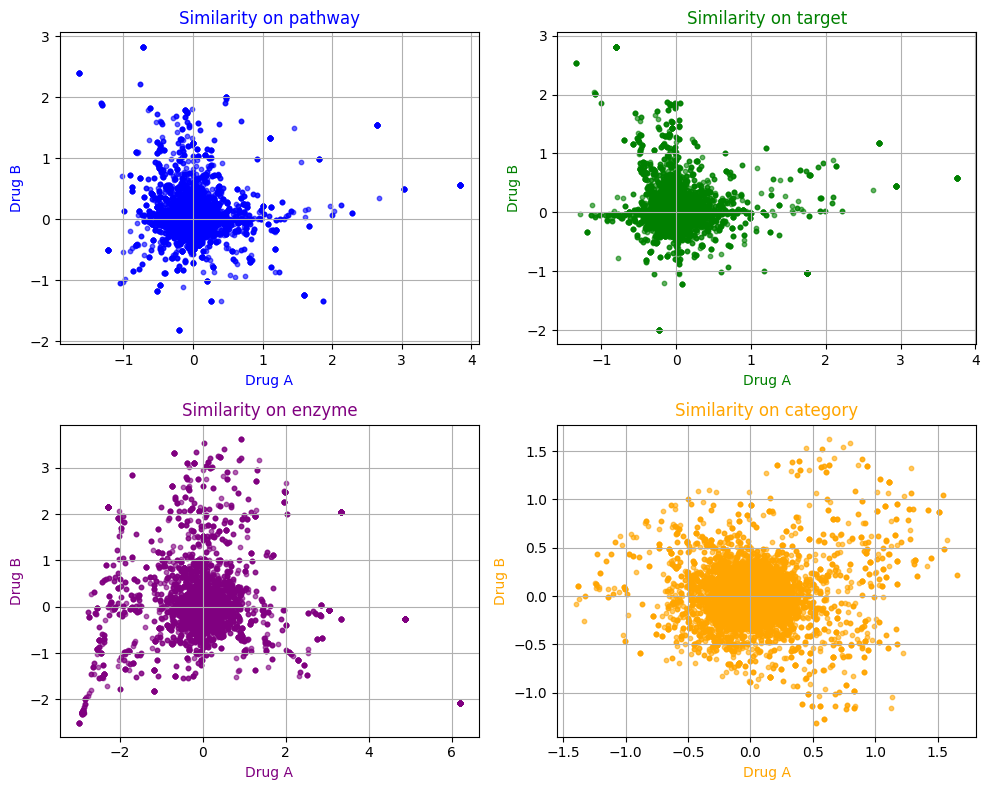

In [ ]:
# plot similarity matrices
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'purple', 'orange']
for idx, (f_name, f_matrix) in enumerate(zip(feature_list, feature_matrix)):
    f_matrix = np.array(f_matrix)
    # plot random 1% of the original data
    sample_indices = np.random.choice(f_matrix.shape[0], size=f_matrix.shape[0] // 100, replace=False)
    f_matrix_sampled = f_matrix[sample_indices]
    f_matrix_reshaped = f_matrix_sampled.reshape(-1, VECTOR_SIZE, 2)

    x = f_matrix_reshaped[:, :, 0].flatten()
    y = f_matrix_reshaped[:, :, 1].flatten()

    plt.subplot(2, 2, idx + 1)
    plt.scatter(x, y, s=10, color=colors[idx], alpha=0.6)
    plt.title(f'Similarity on {f_name}', color=colors[idx])
    plt.xlabel('Drug A', color=colors[idx])
    plt.ylabel('Drug B', color=colors[idx])
    plt.grid(True)

plt.tight_layout()
plt.show()

## Model


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Flatten, Add
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

**DDIMDL Model**

The DDIMDL model consists of an input layer, two dense layers with ReLU activation and dropout for regularization,
and an output layer with softmax activation for multi-class classification. It uses the Adam optimizer and Categorical Cross Entropy as the loss function.



In [ ]:
def DNN(vector_size=VECTOR_SIZE, event_num=EVENT_NUM, drop_rate=DROP_RATE):
    """
    A deep neural network (DNN) model for predicting drug-drug interactions.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L35

    Args:
        vector_size (int): The size of the input feature vector.
        event_num (int): The number of unique interaction events (classes) to predict.
        drop_rate (float): The dropout rate for regularization.

    Returns:
        model: A compiled Keras model ready for training.
    """
    # Define the input layer
    train_input = Input(shape=(vector_size * 2,), name='Inputlayer')
     # First dense layer with 512 units and ReLU activation
    train_in = Dense(512, activation='relu')(train_input)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(drop_rate)(train_in)
    # Second dense layer with 256 units and ReLU activation
    train_in = Dense(256, activation='relu')(train_in)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(drop_rate)(train_in)
    # Output dense layer with 'event_num' units for classification
    train_in = Dense(event_num)(train_in)
    # Softmax activation to convert logits to probabilities for multi-class classification
    out = Activation('softmax')(train_in)
    # Create the model
    model = Model(inputs=train_input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
DDIMDL_model = DNN()
DDIMDL_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (InputLayer)     [(None, 1144)]            0         
                                                                 
 dense (Dense)               (None, 512)               586240    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                            

**CNN-DDI Model**

This model architecture is based on the CNN-DDI method described in the paper. It includes an input layer, 5 convolutional layers with LeakyReLU activation, a residual block, and two fully connected layers with a softmax layer for multi-class classification. The kernel size is the same across all layers (3x1). According to the paper, the purpose of the residual block is to enhance the learning of multi-layer characteristics from the input features. It uses the Adam optimizer and Categorical Cross Entropy as the loss function.

![Table 5.png](https://drive.google.com/uc?export=view&id=1t5hHfM85nWaG4Y6DpIjblb1yuwBSNS84)


In [ ]:
def CNN_DDI(vector_size=VECTOR_SIZE, event_num=EVENT_NUM, loss_fn='categorical_crossentropy'):
    """
    Convolutional Neural Network (CNN) model for predicting drug-drug interactions (DDIs).

    Implementation based on "CNN-DDI: a learning-based method for predicting drug–drug interactions using convolution neural networks."
    https://doi.org/10.1186/s12859-022-04612-2

    Args:
        vector_size (int): The size of the input feature vector for each drug.
        event_num (int): The number of unique DDI event types to predict.

    Returns:
        model: A compiled Keras model ready for training.
    """
    # Define the input layer
    inputs = Input(shape=(vector_size, 2), name='InputLayer')

    # Convolutional layers as specified in the paper
    conv1 = Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
    conv1 = LeakyReLU(alpha=0.2)(conv1)

    conv2 = Conv1D(filters=128, kernel_size=3, strides=1, padding='same')(conv1)
    conv2 = LeakyReLU(alpha=0.2)(conv2)

    # Residual block starts
    conv3_1 = Conv1D(filters=128, kernel_size=3, strides=1, padding='same')(conv2)
    conv3_1 = LeakyReLU(alpha=0.2)(conv3_1)

    conv3_2 = Conv1D(filters=128, kernel_size=3, strides=1, padding='same')(conv3_1)
    conv3_2 = LeakyReLU(alpha=0.2)(conv3_2)

    # Add the input of the residual block (conv2) to its output (conv3_2)
    res_out = Add()([conv2, conv3_2])
    # Residual block ends

    conv4 = Conv1D(filters=256, kernel_size=3, strides=1, padding='same')(res_out)
    conv4 = LeakyReLU(alpha=0.2)(conv4)

    # Flatten the output of the last convolutional layer
    flatten = Flatten()(conv4)

    # Fully connected layers
    fc1 = Dense(267, activation='relu')(flatten)

    fc2 = Dense(event_num)(fc1)  # Assuming 'num_classes' is the number of DDI event types
    out = Activation('softmax')(fc2)

    # Create the model
    model = Model(inputs=inputs, outputs=out)

    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

    return model

In [ ]:
CNN_DDI_model = CNN_DDI()
CNN_DDI_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputLayer (InputLayer)     [(None, 572, 2)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 572, 64)              448       ['InputLayer[0][0]']          
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 572, 64)              0         ['conv1d[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)           (None, 572, 128)             24704     ['leaky_re_lu[0][0]']         
                                                                                            

**Other ML Models**

The other models compared against in the paper include
 random forest (RF), gradient boosting decision tree (GBDT),
logistic regression (LR) and K-nearest neighbor (KNN).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

def logistic_regression_pred(X_train, Y_train, X_test):
    #Logistic Regression model
    # original source code from: https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L182
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    pred = model.predict_proba(X_test)
    return pred

def random_forest_pred(X_train, Y_train, X_test):
    #Random Forest Classifier with 100 trees
    # original source code from: https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L172
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, Y_train)
    pred = model.predict_proba(X_test)
    return pred

def gbdt_pred(X_train, Y_train, X_test):
    #Gradient Boosting Decision Tree (GBDT) model
    # original source code from: https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L174
    model = GradientBoostingClassifier()
    model.fit(X_train, Y_train)
    pred = model.predict_proba(X_test)
    return pred

def svm_pred(X_train, Y_train, X_test):
    #Support Vector Machine (SVM) model with probability estimates
    # original source code from: https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L176
    model = SVC(probability=True)
    model.fit(X_train, Y_train)
    pred = model.predict_proba(X_test)
    return pred

def knn_pred(X_train, Y_train, X_test):
    #K-Nearest Neighbors (KNN) classifier with 4 neighbors
    # original source code from: https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L180
    model = KNeighborsClassifier(n_neighbors=4)
    model.fit(X_train, Y_train)
    pred = model.predict_proba(X_test)
    return pred

## Metrics



DDI is a multi-class classification problem. For evaluation,
accuracy (ACC), area under the precision–recall-curve (AUPR), area
under the ROC curve (AUC), F1 score and Precision are used as
evaluation metrics. Please note,  AUPR & AUC are micro-averaged (averaged
after getting the results of all classes)
while other metrics are macro-averaged. This is done since the data classes are imbalanced.


**Accuracy (ACC)**: The proportion of correct predictions among all predictions made.

**Area Under the Precision-Recall Curve (AUPR)**: A measure of the model's ability to balance precision and recall across different thresholds. Micro-averaging is used for this metric, which calculates the metric globally by considering each instance as a separate prediction.

**Area Under the Receiver Operating Characteristic Curve (AUC)**: A measure of the model's ability to discriminate between classes. Micro-averaging is also used for this metric.

**F1 Score**: The harmonic mean of precision and recall, providing a balanced measure of the model's performance. Macro-averaging is used, which calculates the metric independently for each class and then takes the unweighted mean.

**Precision**: The proportion of true positive predictions among all positive predictions. Macro-averaging is used.

Note that in multi-classification setting, micro-averaged Precision, Recall, and F1 are all equal to the overall accuracy. Micro-averaging considers all instances equally, while macro-averaging treats each class equally, making it more suitable for evaluating performance on imbalanced datasets.

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

def multiclass_precision_recall_curve(y_true, y_score):
    """
    Calculate the precision-recall curve for the first class in a multiclass classification problem.

    This function reshapes the true labels and predicted scores if necessary, and then computes
    the precision-recall curve for the first class. It is designed to work with one-vs-rest
    multiclass classification models where each class is treated independently.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L265

    Args:
      y_true: array-like of shape (n_samples,) or (n_samples, n_classes)
              True binary labels or binary label indicators for each class.
      y_score: array-like of shape (n_samples,) or (n_samples, n_classes)
               Target scores, can either be probability estimates of the positive class,
               confidence values, or non-thresholded measure of decisions.

    Returns:
      precision: array of shape (n_thresholds + 1,)
                 Precision values such that element i is the precision of predictions with
                 score >= thresholds[i] and the last element is 1.
      recall: array of shape (n_thresholds + 1,)
              Recall values such that element i is the recall of predictions with
              score >= thresholds[i] and the last element is 0.
      pr_thresholds: array of shape (n_thresholds,)
                     Decreasing thresholds on the decision function used to compute
                     precision and recall.
    """
    # Ensure the true labels and scores are 1D arrays, reshaping if necessary
    y_true = y_true.ravel()
    y_score = y_score.ravel()
    # Reshape y_true and y_score to 2D arrays if they are 1D
    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))
    if y_score.ndim == 1:
        y_score = y_score.reshape((-1, 1))
    # Extract the true labels and scores for the first class
    y_true_c = y_true.take([0], axis=1).ravel()
    y_score_c = y_score.take([0], axis=1).ravel()
    # Compute precision, recall, and thresholds for the first class
    precision, recall, pr_thresholds = precision_recall_curve(y_true_c, y_score_c)
    return (precision, recall, pr_thresholds)


def roc_aupr_score(y_true, y_score, average="macro"):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR) for binary or multiclass classification.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L278

    Args:
      y_true: array-like of shape (n_samples,) or (n_samples, n_classes)
              True binary labels or binary label indicators for multiclass classification.
      y_score: array-like of shape (n_samples,) or (n_samples, n_classes)
               Target scores, can either be probability estimates of the positive class,
               confidence values, or non-thresholded measure of decisions.
      average: string, ['micro', 'macro', 'binary'] (default='macro')
               If 'binary', calculate AUPR for binary classification problems.
               If 'micro', calculate metrics globally by considering each element of the label
               indicator matrix as a label.
               If 'macro', calculate metrics for each label, and find their unweighted mean.

    Returns:
      AUPR score: float
                  Area Under the Precision-Recall Curve (AUPR) score.
    """
    # Function to calculate AUPR for binary classification
    def _binary_roc_aupr_score(y_true, y_score):
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_score)
        return auc(recall, precision)

    # Function to handle averaging of AUPR scores for multiclass classification
    def _average_binary_score(binary_metric, y_true, y_score, average):  # y_true= y_one_hot
        if average == "binary":
            return binary_metric(y_true, y_score)
        # Handle micro averaging
        if average == "micro":
            y_true = y_true.ravel()
            y_score = y_score.ravel()
        # Ensure y_true and y_score are 2D arrays
        if y_true.ndim == 1:
            y_true = y_true.reshape((-1, 1))
        if y_score.ndim == 1:
            y_score = y_score.reshape((-1, 1))
        n_classes = y_score.shape[1]
        score = np.zeros((n_classes,))
        # Calculate AUPR for each class and average
        for c in range(n_classes):
            y_true_c = y_true.take([c], axis=1).ravel()
            y_score_c = y_score.take([c], axis=1).ravel()
            score[c] = binary_metric(y_true_c, y_score_c)
        return np.average(score)

    return _average_binary_score(_binary_roc_aupr_score, y_true, y_score, average)


## Evaluation

In [ ]:
from sklearn.preprocessing import label_binarize

def evaluate(pred_type, pred_score, y_test, event_num):
    """
    Evaluate the performance of predictions for multi-class classification.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L203

    Args:
        pred_type (array-like): Predicted labels for each sample.
        pred_score (array-like): Predicted scores or probabilities for each class for each sample.
        y_test (array-like): True labels for each sample.
        event_num (int): Number of distinct events or classes.

    Returns:
        list: A list containing two numpy arrays. The first array contains overall evaluation metrics for the model,
              and the second array contains evaluation metrics for each class.
    """
    # Define the number of evaluation metrics for overall performance
    all_eval_type = 11
    # Initialize an array to store overall evaluation metrics
    result_all = np.zeros((all_eval_type, 1), dtype=float)
    # Define the number of evaluation metrics for each class
    each_eval_type = 6
    # Initialize an array to store evaluation metrics for each class
    result_eve = np.zeros((event_num, each_eval_type), dtype=float)
    # Convert true labels to one-hot encoding
    y_one_hot = label_binarize(y_test, classes=np.arange(event_num))
    # Convert predicted labels to one-hot encoding
    pred_one_hot = label_binarize(pred_type, classes=np.arange(event_num))

    # Calculate precision and recall for multi-class classification
    precision, recall, th = multiclass_precision_recall_curve(y_one_hot, pred_score)

    # Calculate overall evaluation metrics
    result_all[0] = accuracy_score(y_test, pred_type)
    result_all[1] = roc_aupr_score(y_one_hot, pred_score, average='micro')
    result_all[2] = roc_aupr_score(y_one_hot, pred_score, average='macro')
    result_all[3] = roc_auc_score(y_one_hot, pred_score, average='micro')
    result_all[4] = roc_auc_score(y_one_hot, pred_score, average='macro')
    result_all[5] = f1_score(y_test, pred_type, average='micro')
    result_all[6] = f1_score(y_test, pred_type, average='macro')
    result_all[7] = precision_score(y_test, pred_type, average='micro')
    result_all[8] = precision_score(y_test, pred_type, average='macro')
    result_all[9] = recall_score(y_test, pred_type, average='micro')
    result_all[10] = recall_score(y_test, pred_type, average='macro')

    # Calculate evaluation metrics for each event type
    for i in range(event_num):
        result_eve[i, 0] = accuracy_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel())
        result_eve[i, 1] = roc_aupr_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel(),
                                          average=None)
        result_eve[i, 2] = roc_auc_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel(),
                                         average=None)
        result_eve[i, 3] = f1_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel(),
                                    average='binary')
        result_eve[i, 4] = precision_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel(),
                                           average='binary')
        result_eve[i, 5] = recall_score(y_one_hot.take([i], axis=1).ravel(), pred_one_hot.take([i], axis=1).ravel(),
                                        average='binary')
    # Return the overall and per-class evaluation metrics

    return [result_all, result_eve]

In [ ]:
def convert_overall_results_to_df(result_all):
    """
    Convert the results_all array into a DataFrame with appropriate metric names as column headers.

    Args:
        results_all (numpy array): An array containing overall evaluation metrics for the model.

    Returns:
        DataFrame: A DataFrame containing overall evaluation metrics for the model with named columns.
    """
    metric_names = [
        "Accuracy",
        "AUPR (micro-averaged)",
        "AUPR (macro-averaged)",
        "AUC (micro-averaged)",
        "AUC (macro-averaged)",
        "F1 Score (micro-averaged)",
        "F1 Score (macro-averaged)",
        "Precision (micro-averaged)",
        "Precision (macro-averaged)",
        "Recall (micro-averaged)",
        "Recall (macro-averaged)"
    ]
    result_df = pd.DataFrame(result_all.transpose(), columns=metric_names)
    return result_df

def convert_event_result_to_df(result_eve):
    """
    Convert the result_eve array into a DataFrame with appropriate metric names as column headers.

    Args:
        result_eve (numpy array): An array containing evaluation metrics for each class.

    Returns:
        DataFrame: A DataFrame containing evaluation metrics for each class with named columns.
    """
    metric_names = [
        "Accuracy",
        "AUPR",
        "AUC",
        "F1 Score",
        "Precision",
        "Recall"
    ]
    result_df = pd.DataFrame(result_eve, columns=metric_names)
    return result_df

## Training

For the CNN-DDI reproduction, 5-fold cross validation was used to evaluate the model according to the paper. The data was randomly split into 5 subsets, with 4 used for training and 1 for testing in each fold. The final metrics reported are the average across the 5 folds.


In [ ]:
from sklearn.model_selection import KFold

def get_index(label_matrix, event_num, seed, CV):
    """
    Generate indices for K-fold cross-validation for each class in the label matrix.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L117

    Args:
        label_matrix (array-like): A 1D array containing the class labels for each sample.
        event_num (int): The number of unique events or classes.
        seed (int): Random seed for reproducibility of the shuffle in KFold.
        CV (int): The number of folds for the K-fold cross-validation.

    Returns:
        numpy.ndarray: An array of indices indicating the fold number for each sample.
    """
    # Initialize an array to store the fold indices for all samples
    index_all_class = np.zeros(len(label_matrix))
    # generate fold indices for each class
    for j in range(event_num):
        # Find the indices of samples belonging to the current class
        index = np.where(label_matrix == j)
        # Initialize KFold with the specified number of splits, shuffling, and random seed
        kf = KFold(n_splits=CV, shuffle=True, random_state=seed)
        # Initialize a counter for the fold number
        k_num = 0
        # Get train and test indices for each fold
        for train_index, test_index in kf.split(range(len(index[0]))):
            # Assign the fold number to the corresponding samples in the overall index array
            index_all_class[index[0][test_index]] = k_num
            # Increment the fold number
            k_num += 1
    # Return the array of fold indices
    return index_all_class

In [ ]:
import gc

def cross_validation(feature_matrix, label_matrix, clf_type, event_num, seed, CV, num_epochs, batch_size, patience=10,
                     evalute_only=False, save_weights=True, loss_fn='categorical_crossentropy',weight_path=''):
    """
    Perform K-fold cross-validation to evaluate the performance of specified classifiers on a DDI prediction task.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L130

    Args:
        feature_matrix (array-like or list of array-like): Feature matrix or list of feature matrices for training and testing.
        label_matrix (array-like): Label matrix corresponding to the true class labels.
        clf_type (str): Type of classifier to be evaluated. Supported types include 'DDIMDL', 'CNN_DDI', 'RF', 'GBDT', 'SVM', 'FM', 'KNN', and logistic regression.
        event_num (int): Number of unique events or classes.
        seed (int): Random seed for reproducibility of the shuffle in KFold.
        CV (int): Number of folds for the K-fold cross-validation.
        num_epochs (int): Number of training epochs for neural network models (DDIMDL and CNN_DDI).
        batch_size (int): Batch size used during training of neural network models (DDIMDL and CNN_DDI).
        patience (int, optional): Number of epochs with no improvement after which training will be stopped for early stopping. Defaults to 10.
        evalute_only (bool): flag to skip CNN training if weights available and run only evaluation
        save_weights (bool): flag to save CNN weights after training
        loss_fn(str): string to indidcate loss function to use during CNN training. Default is categorical_crossentropy.
        weight_path(str): folder to save model weights.

    Returns:
        tuple: A tuple containing two numpy arrays. The first array contains overall evaluation metrics for the model,
               and the second array contains evaluation metrics for each class.
    """
    # Ensure the directory for saving model weights exist
    if not save_weights:
      if not weight_path:
        weight_path = generate_weight_path(clf_type=clf_type,CV_seed=seed,num_folds=CV,
                     num_epochs=num_epochs, batch_size=batch_size,loss_fn=loss_fn)
      if not os.path.exists(weight_path):
        print(f'Creating folder: {weight_path}')
        os.makedirs(weight_path)

    # Initialize arrays to store evaluation results
    all_eval_type = 11
    result_all = np.zeros((all_eval_type, 1), dtype=float)
    each_eval_type = 6
    result_eve = np.zeros((event_num, each_eval_type), dtype=float)
    y_true = np.array([])
    y_pred = np.array([])
    y_score = np.zeros((0, event_num), dtype=float)
    # Generate indices for K-fold cross-validation
    index_all_class = get_index(label_matrix, event_num, seed, CV)
    matrix = []
    if type(feature_matrix) != list:
        matrix.append(feature_matrix)
        feature_matrix = matrix
    for k in range(CV):
        # Split data into training and testing sets based on fold index
        train_index = np.where(index_all_class != k)
        test_index = np.where(index_all_class == k)
        pred = np.zeros((len(test_index[0]), event_num), dtype=float)
        # Train and predict with each feature matrix (in case of multiple feature matrices)
        for i in range(len(feature_matrix)):
            x_train = feature_matrix[i][train_index]
            x_test = feature_matrix[i][test_index]
            y_train = label_matrix[train_index]
            y_test = label_matrix[test_index]
            # one-hot encoding training labels
            y_train_one_hot = np.array(y_train)
            y_train_one_hot = (np.arange(event_num) == y_train[:, None]).astype(dtype='float32')
            # one-hot encoding of testing labels
            y_test_one_hot = np.array(y_test)
            y_test_one_hot = (np.arange(event_num) == y_test[:, None]).astype(dtype='float32')
            if clf_type == 'DDIMDL':
                dnn = DNN()
                # print_memory_usage()
                early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=0, mode='auto')
                dnn.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test_one_hot),
                        callbacks=[early_stopping])
                pred += dnn.predict(x_test)
            elif clf_type == 'CNN_DDI':
                x_train_reshaped = x_train.reshape(-1, VECTOR_SIZE, 2)
                x_test_reshaped = x_test.reshape(-1, VECTOR_SIZE, 2)
                cnn_ddi = CNN_DDI(loss_fn=loss_fn)
                # print_memory_usage()
                weights_file = os.path.join(weight_path, f'{clf_type.lower()}_fold_{k+1}_feature_{i+1}.h5')
                if evalute_only and os.path.exists(weights_file):
                  cnn_ddi.load_weights(weights_file)
                  print(f"Loaded weights from {weights_file}. Skipping training.")
                else:
                  print(f"No weights found or loading not requested for fold {k+1}, feature {i+1}. Starting training.")
                  early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=0, mode='auto')
                  cnn_ddi.fit(x_train_reshaped, y_train_one_hot, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test_reshaped, y_test_one_hot),
                              callbacks=[early_stopping])
                  if save_weights:
                    cnn_ddi.save_weights(weights_file)
                    print(f"Saved weights to {weights_file}.")
                pred += cnn_ddi.predict(x_test_reshaped)
                del cnn_ddi
            elif clf_type == 'RF':
                pred += random_forest_pred(x_train, y_train, x_test)
            elif clf_type == 'GBDT':
                pred += gbdt_pred(x_train, y_train, x_test)
            elif clf_type == 'SVM':
                pred += svm_pred(x_train, y_train, x_test)
            elif clf_type == 'FM':
                pred += gbdt_pred(x_train, y_train, x_test)
            elif clf_type == 'KNN':
                pred += knn_pred(x_train, y_train, x_test)
            elif clf_type == 'LR':
                pred += logistic_regression_pred(x_train, y_train, x_test)
            else:
                raise ValueError(f'{clf_type} is not valid')
        # Aggregate predictions from all feature matrices and determine predicted class
        pred_score = pred / len(feature_matrix)
        pred_type = np.argmax(pred_score, axis=1)
        # Accumulate true labels, predicted labels, and predicted scores
        y_true = np.hstack((y_true, y_test))
        y_pred = np.hstack((y_pred, pred_type))
        y_score = np.row_stack((y_score, pred_score))
        del x_train, x_test, y_train, y_test, y_train_one_hot, y_test_one_hot
        tf.keras.backend.clear_session()
        gc.collect()
    # Evaluate the performance of the classifier
    result_all, result_eve = evaluate(y_pred, y_score, y_true, event_num)
    return result_all, result_eve

In [ ]:
def save_result(feature_name, result_type, clf_type, result, base_path=BASE_PATH):
    """
    Save the evaluation results of a classifier into a CSV file.

    original source code from:
    https://github.com/YifanDengWHU/DDIMDL/blob/master/DDIMDL.py#L321

    Args:
        feature_name (str): Name of the feature set used for the classifier.
        result_type (str): Type of result being saved (e.g., 'accuracy', 'precision').
        clf_type (str): Type of classifier (e.g., 'CNN-DDI', 'RF').
        result (list): A list of evaluation results to be saved.
        base_path (str, optional): Base path for saving the result file. Defaults to BASE_PATH.

    Returns:
        int: 0 on successful execution.
    """
    # Construct the file path by combining base path, feature name, result type, and classifier type
    file_path = base_path + feature_name + '_' + result_type + '_' + clf_type + '.csv'
    if isinstance(result, pd.DataFrame):
        result.to_csv(file_path, index=False)
    else:
      with open(file_path, "w", newline='') as csvfile:
          writer = csv.writer(csvfile)
          for i in result:
              writer.writerow(i)
    return 0

In [ ]:
import hashlib

def generate_weight_path(clf_type=None, similarity_measure=None, feature_name_set=None,
                         CV_seed=None, num_folds=None, num_epochs=None, batch_size=None, loss_fn=None):
    """
    Generate a path for saving TensorFlow model weights based on a hash of the training arguments.
    """
    unique_identifier='_'.join(list(map(str,filter(None,[feature_name_set, feature_name_set, num_folds, num_epochs, batch_size]))))
    # unique_identifier = f"{feature_name_set}_{CV_seed}_{num_folds}_{num_epochs}_{batch_size}"
    # Generate a hash of the unique identifier
    hash_object = hashlib.sha256(unique_identifier.encode())
    hash_digest = hash_object.hexdigest()[:10]

    # cnn_ddi_jaccard_categorial_crossentropy_abcde12345
    # folder_name = f"{clf_type}_{similarity_measure}_{loss_fn}_{hash_digest}".lower()
    folder_name='_'.join(list(map(str,filter(None,[clf_type, similarity_measure, loss_fn, hash_digest])))).lower()

    weight_path = os.path.join(WEIGHT_PATH, folder_name)

    os.makedirs(weight_path, exist_ok=True)

    return weight_path

In [ ]:
def run_cross_validation(clf_list, featureName, featureMatrix, labelMatrix, event_num=EVENT_NUM, seed=0, num_folds=5, num_epochs=100, batch_size=128
                         ,evalute_only=False, save_weights=True, loss_fn='categorical_crossentropy', similarity_measure=None):
    """
    run the cross-validation for the list of classifiers and save the results.

    Args:
        clf_list (list): list of classifier model names
        featureName (str): A descriptive name for the feature set used, which will be included in the result filenames.
        featureMatrix (array-like): The matrix of features used for training and testing the classifiers.
        labelMatrix (array-like): The matrix of labels corresponding to the featureMatrix.
        event_num (int): The number of unique event types to predict. Defaults to EVENT_NUM.
        seed (int): The random seed for reproducibility of cross-validation splits. Defaults to 0.
        num_folds (int): The number of folds for K-fold cross-validation. Defaults to 5.
        num_epochs (int): The number of epochs for training each classifier. Defaults to 100.
        batch_size (int): The batch size for training each classifier. Defaults to 128.
        evalute_only (bool): flag to skip CNN training if weights available and run only evaluation
        save_weights (bool): flag to save CNN weights after training
        loss_fn(str): string to indidcate loss function to use during CNN training. Default is categorical_crossentropy.
        similarity_measure(str): optional similarity_measure name string used for creating path to save weights

    Returns:
        dict: Two dictionaries containing the overall and per-event evaluation results for each classifier.
    """
    result_all = {}
    result_eve = {}
    all_matrix = featureMatrix
    new_label = labelMatrix
    start = time.perf_counter()
    for clf in clf_list:
      # weight_path=f'{WEIGHT_PATH}/{clf}_{similarity_measure}_{loss_fn}'
      weight_path=generate_weight_path(clf_type=clf, similarity_measure=similarity_measure,
                                       feature_name_set=featureName, CV_seed=seed,
                                       #num_folds=num_folds, num_epochs=num_epochs,
                                       batch_size=batch_size, loss_fn=loss_fn)

      clf_start = time.perf_counter()
      print(f"running cross validation for {clf}")
      # Perform cross-validation using the specified classifier
      all_result, each_result = cross_validation(all_matrix, new_label, clf, event_num, seed, num_folds, num_epochs, batch_size,
                                                 evalute_only=evalute_only, save_weights=save_weights, loss_fn=loss_fn, weight_path=weight_path)
      clf_end = time.perf_counter()
      timeTaken = clf_end - clf_start
      all_result  = convert_overall_results_to_df(all_result)
      each_result = convert_event_result_to_df(each_result)
      all_result['Time (s)'] = timeTaken
      # Save the cross-validation results to CSV files
      save_result(featureName, 'all', clf, all_result)
      save_result(featureName, 'each', clf, each_result)
      result_all[clf] = all_result
      result_eve[clf] = each_result
      print(all_result.head())
      print(f"time used for {clf}:", timeTaken )
    print("Total time used:", time.perf_counter() - start)

### Hyperparameters

* Batch size used for training: 128
* Loss Function: Categorical Cross Entropy
* Activation function: Leaky ReLU with *a* parameter set to 0.2
* Optimizer: Adam
  * Default Learning rate: 0.001
  * Default Beta 1: 0.9
  * Default Beta 2: 0.999
  * Default Epsilon: 1e-07

* Hidden Size: There are two full-connected layers after convolutional layers. The first full-connected
layer has 267 hidden units and the second has 65 hidden units


### Computational Requirements

The CNN-DDI model has approximately 39 million parameters. A single forward pass requires close to 332 million operations. To run the full cross-validation training and evaluation, it requires modern, high performance GPU such as Google Colab T4 or GeForce RTX 2080 Ti with at least 11 GBs of memory. It takes on average 60 minutes to run 5-fold cross-validation. For each fold, the number of trials is equal to the number of features (4 in our case). For each trial the number of training epochs is 100. However, since the training process is using the early-stopping
strategy (automatically stops the training if
no improvement is observed in 10 epochs), the actual number of epochs is usually between 12 and 20. Each epoch on average takes 12 seconds to complete. To train on each feature, it takes approx. 3 minutes. So, the total time for cross-validation is 3min x 4 (number features) x 5 (number folds) = 60min.

In [ ]:
print("Layers         # operations for a single forward pass")

# Convolutional layers operations
op_conv1 = VECTOR_SIZE * 3 * 2 * 64 * 2
print(f"conv1          {op_conv1:,}")
op_conv2 = VECTOR_SIZE * 3 * 64 * 128 * 2
print(f"conv2          {op_conv2:,}")
op_conv3_1 = VECTOR_SIZE * 3 * 128 * 128 * 2
print(f"conv3_1        {op_conv3_1:,}", )
op_conv3_2 = VECTOR_SIZE * 3 * 128 * 128 * 2
print(f"conv3_2        {op_conv3_2:,}")
op_conv4 = VECTOR_SIZE * 3 * 128 * 256 * 2
print(f"conv4          {op_conv4:,}")

# Residual addition
op_residual = VECTOR_SIZE * 128
print(f"residual       {op_residual:,}")
# Flatten - the number of features going into the first dense layer
flatten_size = VECTOR_SIZE * 256

# Fully connected layers operations
op_fc1 = flatten_size * 267 * 2  # 267 comes from the assumed number of output units for the first dense layer
print(f"fc1            {op_fc1:,}")
op_fc2 = EVENT_NUM * (267 + 1) * 2  # Event_num outputs from the final layer
print(f"fc2            {op_fc2:,}")

# Total operations
total_ops = op_conv1 + op_conv2 + op_conv3_1 + op_conv3_2 + op_conv4 + op_residual + op_fc1 + op_fc2
print("\nTotal Operations:", "{:,}".format(total_ops))

Layers         # operations for a single forward pass
conv1          439,296
conv2          28,114,944
conv3_1        56,229,888
conv3_2        56,229,888
conv4          112,459,776
residual       73,216
fc1            78,194,688
fc2            34,840

Total Operations: 331,776,536


## Demonstration

For the purposes of running this notebook in under 8 minutes, the cross-validation is set to evaluate only mode.

This skips the training and loads the previously trained model weights downloaded from the Google Drive folder.

If want you to see a demonstration of training and evaluation, please set evaluate_only to False. Also recommend to set the number of epochs set to 1 (vs. 100) and number of folds to 2 (vs. 5)

In [ ]:

feature_list = ["pathway", "target", "enzyme", "category"]
feature_name = create_feature_set_name(feature_list)

similarity_measure = 'Jaccard'
feature_matrix, new_label, event_num = construct_feature_matrix(feature_list, df_drug, VECTOR_SIZE, mechanism, action, drugA, drugB, similarity_measure)

classifiers = ["CNN_DDI"]
num_folds = 5
num_epochs = 100
batch_size = 128
CV_seed = 0
evalute_only = True
save_weights = True
loss_fn = 'categorical_crossentropy' #'categorical_crossentropy', 'kl_divergence', 'cosine_similarity
run_cross_validation(clf_list=classifiers,featureName=feature_name,featureMatrix=feature_matrix,labelMatrix=new_label,
                     event_num=event_num, seed=CV_seed, num_folds=num_folds, num_epochs=num_epochs, batch_size=batch_size,
                     evalute_only=evalute_only, save_weights=save_weights, loss_fn=loss_fn, similarity_measure=similarity_measure)

running cross validation for CNN_DDI
Loaded weights from ./CNN_DDI/models_weights/cnn_ddi_jaccard_categorical_crossentropy_a6ca59de4e/cnn_ddi_fold_1_feature_1.h5. Skipping training.
234/234 [==============================] - 2s 6ms/step
Loaded weights from ./CNN_DDI/models_weights/cnn_ddi_jaccard_categorical_crossentropy_a6ca59de4e/cnn_ddi_fold_1_feature_2.h5. Skipping training.
234/234 [==============================] - 1s 5ms/step
Loaded weights from ./CNN_DDI/models_weights/cnn_ddi_jaccard_categorical_crossentropy_a6ca59de4e/cnn_ddi_fold_1_feature_3.h5. Skipping training.
234/234 [==============================] - 2s 7ms/step
Loaded weights from ./CNN_DDI/models_weights/cnn_ddi_jaccard_categorical_crossentropy_a6ca59de4e/cnn_ddi_fold_1_feature_4.h5. Skipping training.
234/234 [==============================] - 1s 6ms/step
Loaded weights from ./CNN_DDI/models_weights/cnn_ddi_jaccard_categorical_crossentropy_a6ca59de4e/cnn_ddi_fold_2_feature_1.h5. Skipping training.
234/234 [=========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy  AUPR (micro-averaged)  AUPR (macro-averaged)  \
0  0.878918               0.936303               0.823182   

   AUC (micro-averaged)  AUC (macro-averaged)  F1 Score (micro-averaged)  \
0              0.997912              0.985594                   0.878918   

   F1 Score (macro-averaged)  Precision (micro-averaged)  \
0                   0.764898                    0.878918   

   Precision (macro-averaged)  Recall (micro-averaged)  \
0                    0.846637                 0.878918   

   Recall (macro-averaged)   Time (s)  
0                 0.716468  85.543113  
time used for CNN_DDI: 85.54311309700006
Total time used: 85.55691192099994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results



### Overview

The CNN-DDI paper results are mainly documented in Table 1, Table 2, Table 3, and Table 4. Table 1 compares 3 similarity measures for the performance of CNN-DDI model. Table 2 tests various feature combinations. Table 3 compares the CNN-DDI model with other state-of-art models. Table 4 is a comparison of the CNN-DDI model to  the DDIMDL model.
In our results we generate four tables named Table 1 Reproduction, Table 2 Reproduction, Table 3 Reproduction, and Table 4 Reproduction. For each set of tables we have a Comparative Analysis table which shows the percentage difference from the Reproduction table to the original table from the CNN-DDI study.
We then compare our results with the CNN-DDI paper to verify the author's arguments accordingly.
All tables use ACC, AURP (micro-averaged), AUC (micro-averaged), F1, Precision, and Recall as evaluation metrics.


## Table 1 and Table 1 Reproduction
In Table 1 three different similarity measures—Jaccard, Cosine, and Gaussian-are used to calculate the similarities between feature vectors when constructing the input feature matrix. The point of this experiment is to analyze the impact of different similarity measures on the CNN-DDI model performance. Table 1 shows that the different similarity measures contribute to similar results and that the model performs well on all 3.

Table 1 Reproduction reproduces the results of Table 1 using the same 3 similarity measures. The reproduction study shows a very slight decrease(<%1) in accuracy across all similarity measures, with the largest difference seen in Jaccard similarity (from 0.8871 to 0.8803). Interestingly, the reproduction results do show a slight improvement in AUPR & F1-score for all measures.

While there are minor differences in the specific metrics, our results show that all 3 similarity measures do in fact have a strong and similar performance, which supports the original findings. Jaccard similarity is used for the rest of the experiments by default.


![Table 1.png](https://drive.google.com/uc?export=view&id=1umhFoY8Z_mPXwOgYoRGPDRC4gUd2_ElE)

![Table 1 R.png](https://drive.google.com/uc?export=view&id=1-aOyN_28loBjH-WiWbjWIC3qgMefPcGH)

![Table 1 Comparision.png](https://drive.google.com/uc?export=view&id=1WTrGM-6kFvkEblPAcco44y1Mb2TMhnmV)



## Table 2 and Table 2 Reproduction

The goal of Table 2 is to test the impact on CNN-DDI performance from adding certain features, especially the drug category. Features T, P, E, and C (target, pathway, enzyme, and drug category) are put into the model training and evaluation with different combinations. In the original paper, Table 2 demonstrates that drug category is the feature that is the strongest predictor for DDIs (significantly outperforms other single features with an ACC of 0.8702, AUPR of 0.9139, and an F1 score of 0.7421). Adding the drug category feature also consistently improves performance across different combinations, as seen with T+C and P+C. When CNN-DDI includes all four features (T+P+E+C) it gets the best performance (ACC of 0.8871, AUPR of 0.9251, and an F1 score of 0.7496).

To verify these findings, we retest the same feature combinations in our Table 2 Reproduction. Overall we find the results in the two tables follow similar patterns. Most metrics in Table 2 Reproduction have about 0-5% difference to the values of Table 2, with some combinations having higher variation and improved performance in the reproduction.

The drug category feature still shows superior performance with an improved ACC of 0.8822, AUPR of 0.9450, and an F1 score of 0.7698. This verifies that the drug category as the predictive feature for DDIs represents the highest performance. However, unlike the original study, the combination of all four features (T+P+E+C) does not show a clear advantage over three-feature combinations like T+E+C or P+E+C in the reproduction.


![Table 2.png](https://drive.google.com/uc?export=view&id=1kpJdG9u9MUWCLbhJjyRsRiSHcQYO_m7n)


![Table 2 R.png](https://drive.google.com/uc?export=view&id=1fbC8dhaDiqN9M4squMcifsFk3jOQcfXn)

![Table 2 Comparison.png](https://drive.google.com/uc?export=view&id=1Ig7W8WbQB50VJVpzno65qIoaYxf27O-9)



## Model comparison


#### Table 4 and Table 4 Reproduction

Table 4 compares the results of the CNN-DDI and DDIMDL model (with and without "category" feature included). Based on Table 4, the paper concludes that the CNN-DDI model generally outperformed DDIMDL model, particularly when the "category" feature is included. To verify this claim, we compare the reproduced results of the CNN-DDI and DDIMDL models in Table 4 Reproduction.

In our reproduction the CNN-DDI model showed similar strong performance with an ACC of 0.8803, AUPR of 0.9385, AUC of 0.9979, F1 score of 0.7743, Precision of 0.8499, and Recall of 0.7309. Surprisingly, the DDIMDL** with category (DDIMDL) result showed slightly better performance (particularly AUPR and F1) with an ACC of 0.8855, AUPR of 0.9419, AUC of 0.9979, F1 score of 0.7807, Precision of 0.8460, and Recall of 0.7431.

The CNN-DDI model shows a decrease in accuracy in the reproduction study compared to the original (from 0.8871 to 0.8803), while DDIMDL with category feature shows a very slight decrease (from 0.8865 to 0.8855). The reproduction results for CNN-DDI show an increase in AUPR (from 0.9251 to 0.9385), but DDIMDL with category also shows a significant increase (from 0.9230 to 0.9419). Both models show an increase in F1 score with DDIMDL with category showing a more substantial increase (from 0.7559 to 0.7807).

Overall, all our metrics results are within 0-3% difference to the original study. However we cannot fully support the claim that the CNN-DDI model outperforms the DDIMDL model when using the same 4 features. We do not observe that to be the case as shown in the last row of table 4 reproduction, the DDIMDL performance in all metrics is slightly better than CNN-DDI result.



![Table 4.png](https://drive.google.com/uc?export=view&id=14SJJRxTx14OnH3_KkjvKtTXo-PwWSCFJ)


![Table 4 R.png](https://drive.google.com/uc?export=view&id=1u91bILN3SHaaPubSoQx7aLKGrREt_7kj)

![Table 4 Comparison.png](https://drive.google.com/uc?export=view&id=1FXR3XffAA_O3hjROAYGJ-UEO2ebpaGUN)

###Table 3 and Table 3 Reproduction

In the paper, Table 3 compares the performance of CNN-DDI with other state-of-the-art machine learning models including Gradient Boosting Decision Tree (GBDT), Random Forest (RF), K-Nearest Neighbors (KNN), and Logistic Regression (LR). The data shows CNN-DDI has superior performance over those other ML models across all evaluated metrics.

We reproduce all the model results as Table 3 Reproduction. While there is a slight variation in the performance metrics between the original and reproduction studies, the overall pattern remains consistent. Our results match the papers in the way that CNN-DDI model performs better than other models in all metrics.

In the reproduction, CNN-DDI maintains its lead with an ACC of 0.8803, AUPR of 0.9385, AUC of 0.9979, F1 score of 0.7743, Precision of 0.8499, and Recall of 0.7309. Except GBDT, all of the ML models are within 0-4% variation to the original study result across all evaluated metrics. With GBDT there is a noticeable drop in ACC from 0.8327 to 0.7673, however we feel this is still reasonable and mostly due to the way the GBDT algorithm works.




![Table 3.png](https://drive.google.com/uc?export=view&id=1O_WT1JUbllxg22Q-opkKbUjELtf596cK)

![Table 3 R.png](https://drive.google.com/uc?export=view&id=1lFJ5utmt1I12jkLjRmChu4-SDRetxitv)

![Table 3 Comparison.png](https://drive.google.com/uc?export=view&id=1WKfOjkoK2XrjsPVD9pTYOCuDmYYcaH-L)


### Precision-Recall Curves of Different Models

To visualize the model comparision, we have plotted the Precision-Recall Curves from some of the different models run in our reproduction.


![Precision-Recall Curves.png](https://drive.google.com/uc?export=view&id=1I7QRRgZzvnUzBKbrPnoqEuKyKUHZ-vEm)


##Ablations

For feature ablation, we evaluate the model's performance by individually removing drug categories, targets, pathways, and enzyme features. For model ablation, we assess the impact of removing the residual block on the model performance and try different loss functions.

The results of the feature ablation indicate that training on the combination of all four features does not necessarily have the highest performance over other feature combinations all the time. For example, the ACC and Precision score of removing 'pathway' is higher than having all 4 features. Removing category feature shows the biggest drop in the CNN-DDI model performance indicating that it is an important feature that should be kept.

For model ablation we have tested the impact of the training with/ without residual block. Specifically, we remove conv3_1 , conv3_2 layers and the addition of input to the output. The block is replaced with a single convolution layer with 128 filters and the same kernel size (3x1). With the residual block, the model performs slightly better on ACC, F1, and Precision metrics whereas without the residual block, the model performs slightly better on AUPR, AUC, and Recall metrics. The results show that the residual block has limited impact on the model's performance.

We have also tested different loss functions including categorical cross entropy, KL-divergence and cosine-similarity. Categorical cross-entropy and KL-divergence are shown to have similar performance. Both perform significantly better than using cosine-similarity as the loss function. Our results show that utilizing categorical cross entropy for this experiment is a reasonable choice.

![Ablation Plan.png](https://drive.google.com/uc?export=view&id=1qd_X56IjHvUXGo7PV0Zyl8hKo6nQJjHy)


# Discussion





###Reproducibility Assessment
Based on the reproduced results, our assessment is that the CNN-DDI paper is reproducible. Most of our results match those reported in the paper within a reasonable range and the differences are mostly due to randomness. These results validate the effectiveness of using category as a predictor for DDIs, and using categorical cross-entropy and Jaccard similarity to train the CNN-DDI model. However, not all claims made by the original author are supported by our reproduction results. Contrary to the author's assertions is that CNN-DDI outperforms DDIMDL on the same four features and that the CNN-DDI model with all four features is superior to other feature combinations.

###Ease in Reproduction
The ease in reproducing this study come from these facts:
1. The structure of the CNN-DDI model is well-defined and demonstrated in the paper, providing a solid foundation for reproduction.
2. Around 70% of data is available and data collection methods are indicated in the CNN-DDI and DDIMDL papers.
3. Most of the ML models used in this study could be run on a local machine with a modern GPU (RTX 2080 TI) and took less than 3 hours to train.

###Difficulties in Reproduction
1. No access to the source code. This paper is about CNN-DDI while the GitHub repo provided is for an earlier paper about the DDIMDL model. While the available code from DDIMDL did provide the base for our team to work on, it is not comparable to the real source code of CNN-DDI paper. Even though the overall structure of this CNN model is described in the paper, we were still missing some critical information, such as the exact number of epochs, whether dropout was used, and some other configurations that may impact the model performance. Lacking access to the source code and some crucial details can be one of the causes that leads to differences between reproduction data and paper data.
2. The provided dataset is incomplete. Adding drug category to the feature list can improve the model performance is the key statement of CNN-DDI paper. However, the category data was not available in the database of the DDIMDL repo. Thus, we collected the missing data and merged it with the existing dataset. However this data may have changed since the authors of the CNN-DDI paper accessed it.
3. Computing resources are limited. It may sound contradictory since we just mentioned it is good for this project to be able to run on the local machine. Initially, running on a local machine failed due to unacceptable training time and the out-of-memory issue. Our team spent efforts switching between different versions of PyTorch and TensorFlow with various settings to make the running successful eventually. Now it takes approximately 1 hour to train the CNN-DDI model.

###Suggestions for Enhancing Reproducibility

**For Original Authors**

For authors of this paper, it would be appreciated if they can release the source code or respond to the technical questions in email. Otherwise, just working with the code from another paper can be challenging.

In general, the methodology mentioned in both the paper and the code repository should cover all aspects of the experimental setup, including all the hyperparameter settings. Also the data should be shared if possible, preferably on a platform like GitHub. If sharing data is not feasible due to privacy or legal concerns, the authors should provide detailed instructions on how to obtain or generate the necessary data. Including version-controlled datasets and the actual models used in experiments can also help to ensure that reproducers can access the exact data points and model versions used in the original study. Lastly, we feel authors should take advantage of containerization tools like Docker to create reproducible environments with all necessary dependencies pre-installed. This eliminates issues related to differing software versions or system configurations.


**For Future Reproducers**

For future reproducers, we recommend carefully reading the entire paper and try to understand the authors' main goal and methodology to avoid misunderstandings. Pay special attention to the CNN-DDI model architecture and the primary objectives of the research to ensure you are clear on what needs to be reproduced. Additionally, by studying the DDIMDL paper and code you can get hints on implementing and training the CNN-DDI model. There are many reusable parts in the DDIMDL code such as data loading, model evaluation, and result evaluation. This helps in saving time and reducing the potential for errors from implementing on your own. You should also document your reproduction process, including any challenges faced and how you overcame them. This can help save others time from repeating the same mistakes.
Lastly it's good to participate in discussions with other teams working to reproduce the same paper. This can help overcome practical challenges encountered during reproduction.




# Public Github Repo

All source codes and data are available in our projects repo linked below

https://github.com/abaldeo/CS598_DLH_Project/tree/CNN_DDI


**Important** Please make sure your on CNN-DDI branch

# References

1.  Zhang, C., Lu, Y. & Zang, T. CNN-DDI: a learning-based method for predicting drug–drug interactions using convolution neural networks. BMC Bioinformatics 23 (Suppl 1), 88 (2022). https://doi.org/10.1186/s12859-022-04612-2

2. Deng, Y., Xu, X., Qiu, Y., Xia, J., Zhang, W., & Liu, S. (2020). A multimodal deep learning framework for predicting drug-drug interaction events. Bioinformatics (Oxford, England), 36(15), 4316–4322. https://doi.org/10.1093/bioinformatics/btaa501

